#### Import Libraries

In [1]:
import model_build_chlorophyll as chl_mod

##### Defining common Variables

In [2]:
n_features=2
n_out = 7 
epochs = 30
batch_size = 32

### Bay of Bengal

##### Model Training

X_train shape: (6828, 105, 2)
Epoch 1/30
214/214 [==============================] - 2s 5ms/step - loss: 0.0676 - val_loss: 0.0395
Epoch 2/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0572 - val_loss: 0.0378
Epoch 3/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0552 - val_loss: 0.0387
Epoch 4/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0533 - val_loss: 0.0425
Epoch 5/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0527 - val_loss: 0.0367
Epoch 6/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0522 - val_loss: 0.0370
Epoch 7/30
214/214 [==============================] - 1s 3ms/step - loss: 0.0520 - val_loss: 0.0355
Epoch 8/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0519 - val_loss: 0.0388
Epoch 9/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0514 - val_loss: 0.0383
Epoch 10/30
214/214 [==============================] - 1s 4ms/step - l

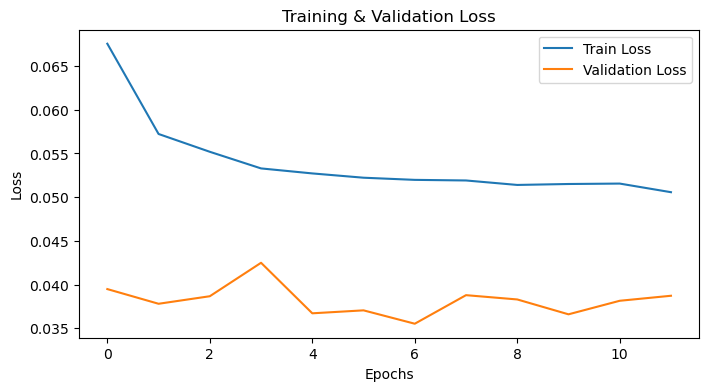

In [4]:
chl_mod.set_seeds(42)
n_lag = 105   
chl_file = "Data_chl_2020/bay_of_bengal.nc"
sst_file = "Data_sst_2020/bay_of_bengal.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)

model = chl_mod.build_cnn_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_cnn_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

43/43 [==============================] - 0s 2ms/step
t+1 RMSE: 0.0188 | MAE: 0.0130 | R²: 0.5382
t+2 RMSE: 0.0189 | MAE: 0.0130 | R²: 0.5297
t+3 RMSE: 0.0191 | MAE: 0.0133 | R²: 0.5194
t+4 RMSE: 0.0197 | MAE: 0.0140 | R²: 0.4897
t+5 RMSE: 0.0192 | MAE: 0.0134 | R²: 0.5136
t+6 RMSE: 0.0187 | MAE: 0.0130 | R²: 0.5409
t+7 RMSE: 0.0197 | MAE: 0.0138 | R²: 0.4878


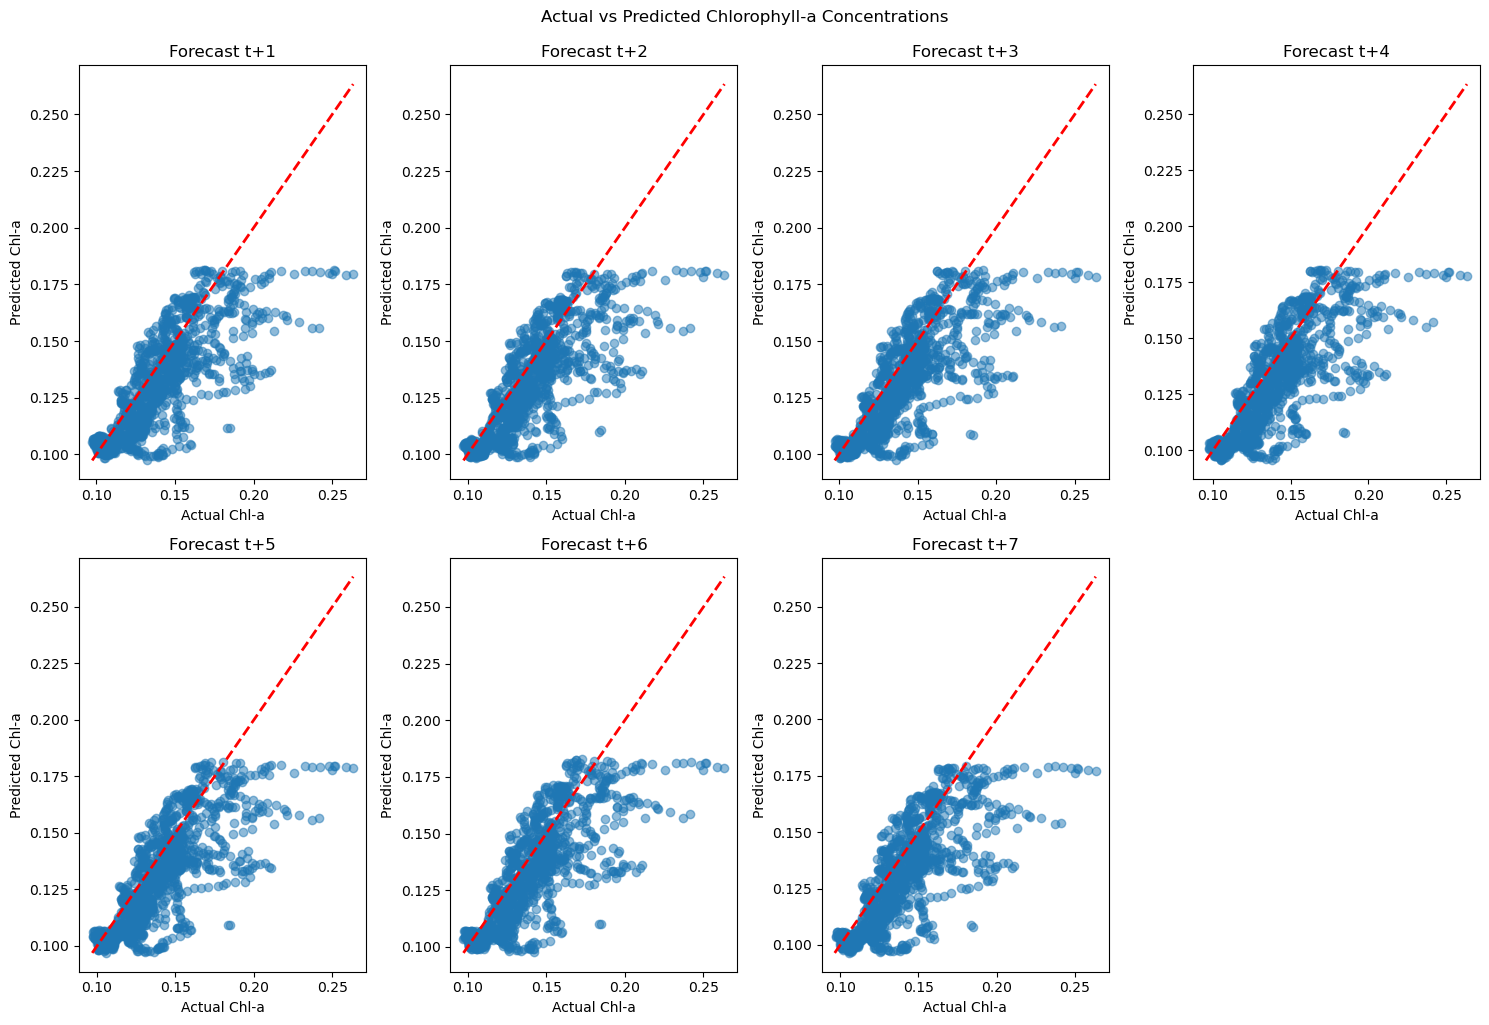

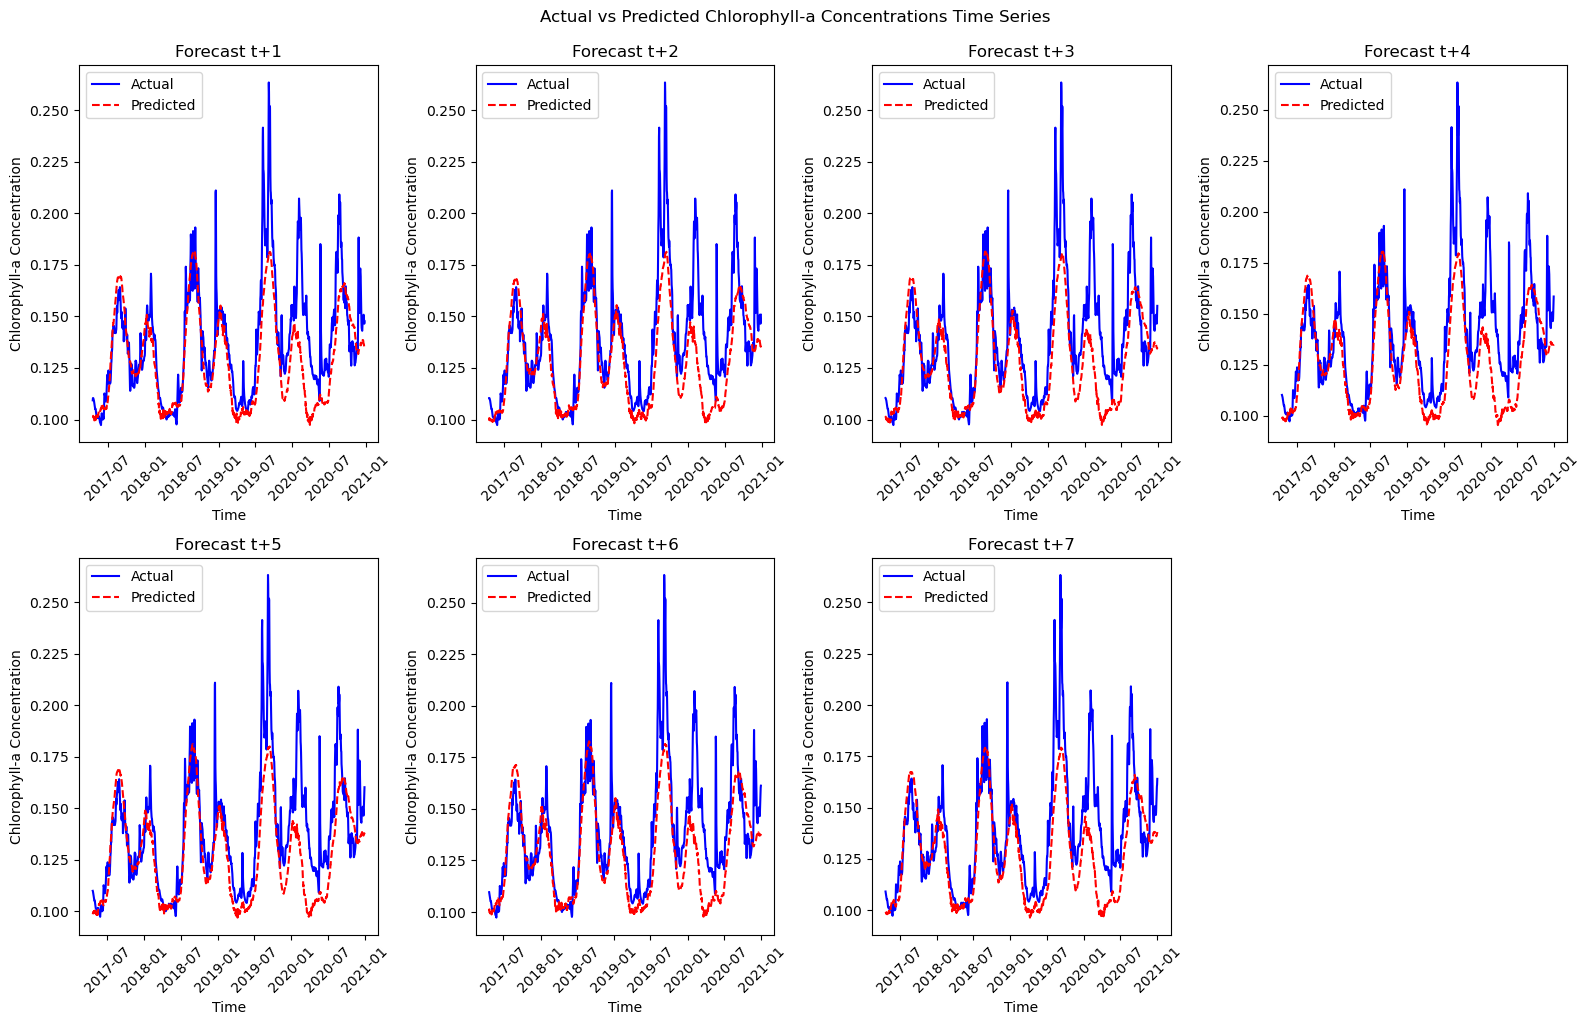

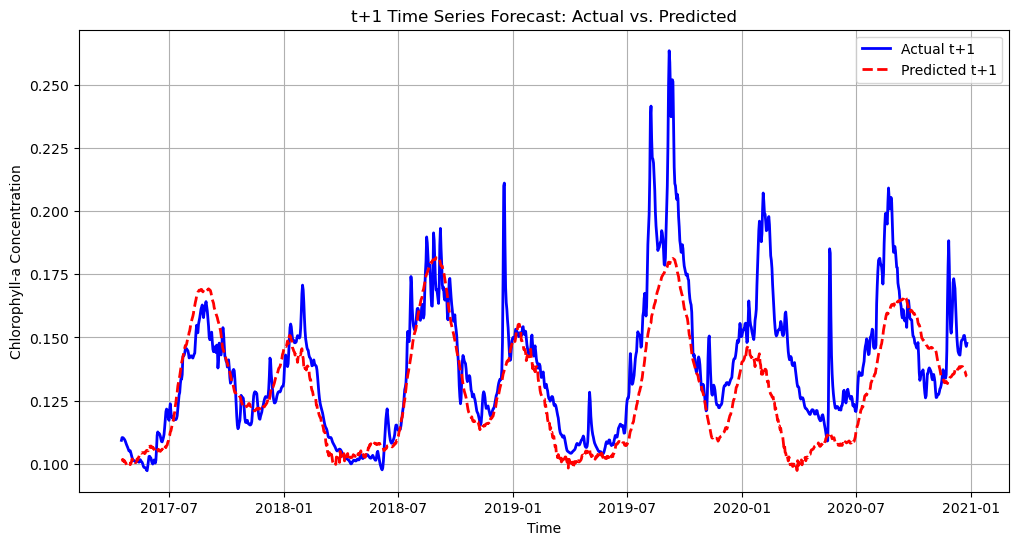

In [5]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Gulf of Mannar

#### Model Training

X_train shape: (6833, 100, 2)
Epoch 1/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0538 - val_loss: 0.0394
Epoch 2/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0451 - val_loss: 0.0382
Epoch 3/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0423 - val_loss: 0.0397
Epoch 4/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0410 - val_loss: 0.0389
Epoch 5/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0410 - val_loss: 0.0360
Epoch 6/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0401 - val_loss: 0.0367
Epoch 7/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0402 - val_loss: 0.0360
Epoch 8/30
214/214 [==============================] - 1s 3ms/step - loss: 0.0396 - val_loss: 0.0364
Epoch 9/30
214/214 [==============================] - 1s 4ms/step - loss: 0.0390 - val_loss: 0.0364
Epoch 10/30
214/214 [==============================] - 1s 4ms/step - l

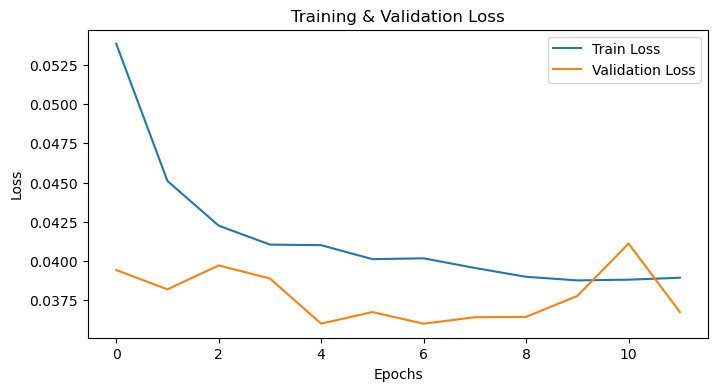

In [7]:
chl_mod.set_seeds(42)
n_lag = 100   
chl_file = "Data_chl_2020/gulf_of_mannar.nc"
sst_file = "Data_sst_2020/gulf_of_mannar.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_cnn_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_cnn_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


##### Model Testing

43/43 [==============================] - 0s 2ms/step
t+1 RMSE: 0.1347 | MAE: 0.0831 | R²: 0.5199
t+2 RMSE: 0.1357 | MAE: 0.0851 | R²: 0.5122
t+3 RMSE: 0.1363 | MAE: 0.0837 | R²: 0.5074
t+4 RMSE: 0.1407 | MAE: 0.0869 | R²: 0.4748
t+5 RMSE: 0.1396 | MAE: 0.0853 | R²: 0.4829
t+6 RMSE: 0.1479 | MAE: 0.0892 | R²: 0.4191
t+7 RMSE: 0.1478 | MAE: 0.0898 | R²: 0.4198


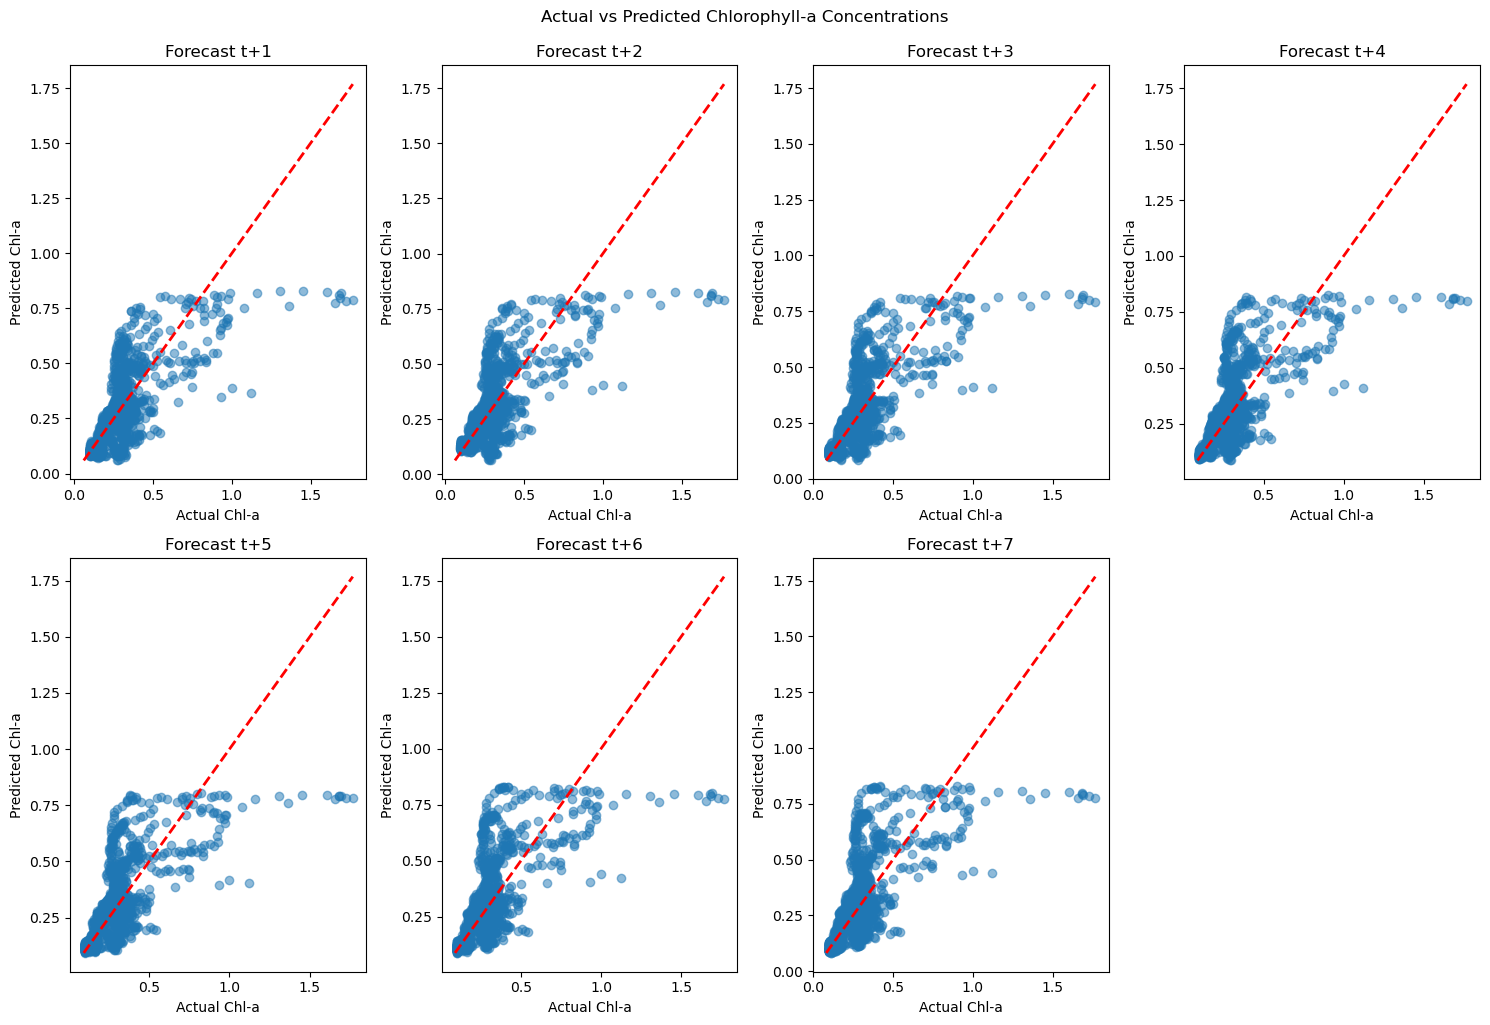

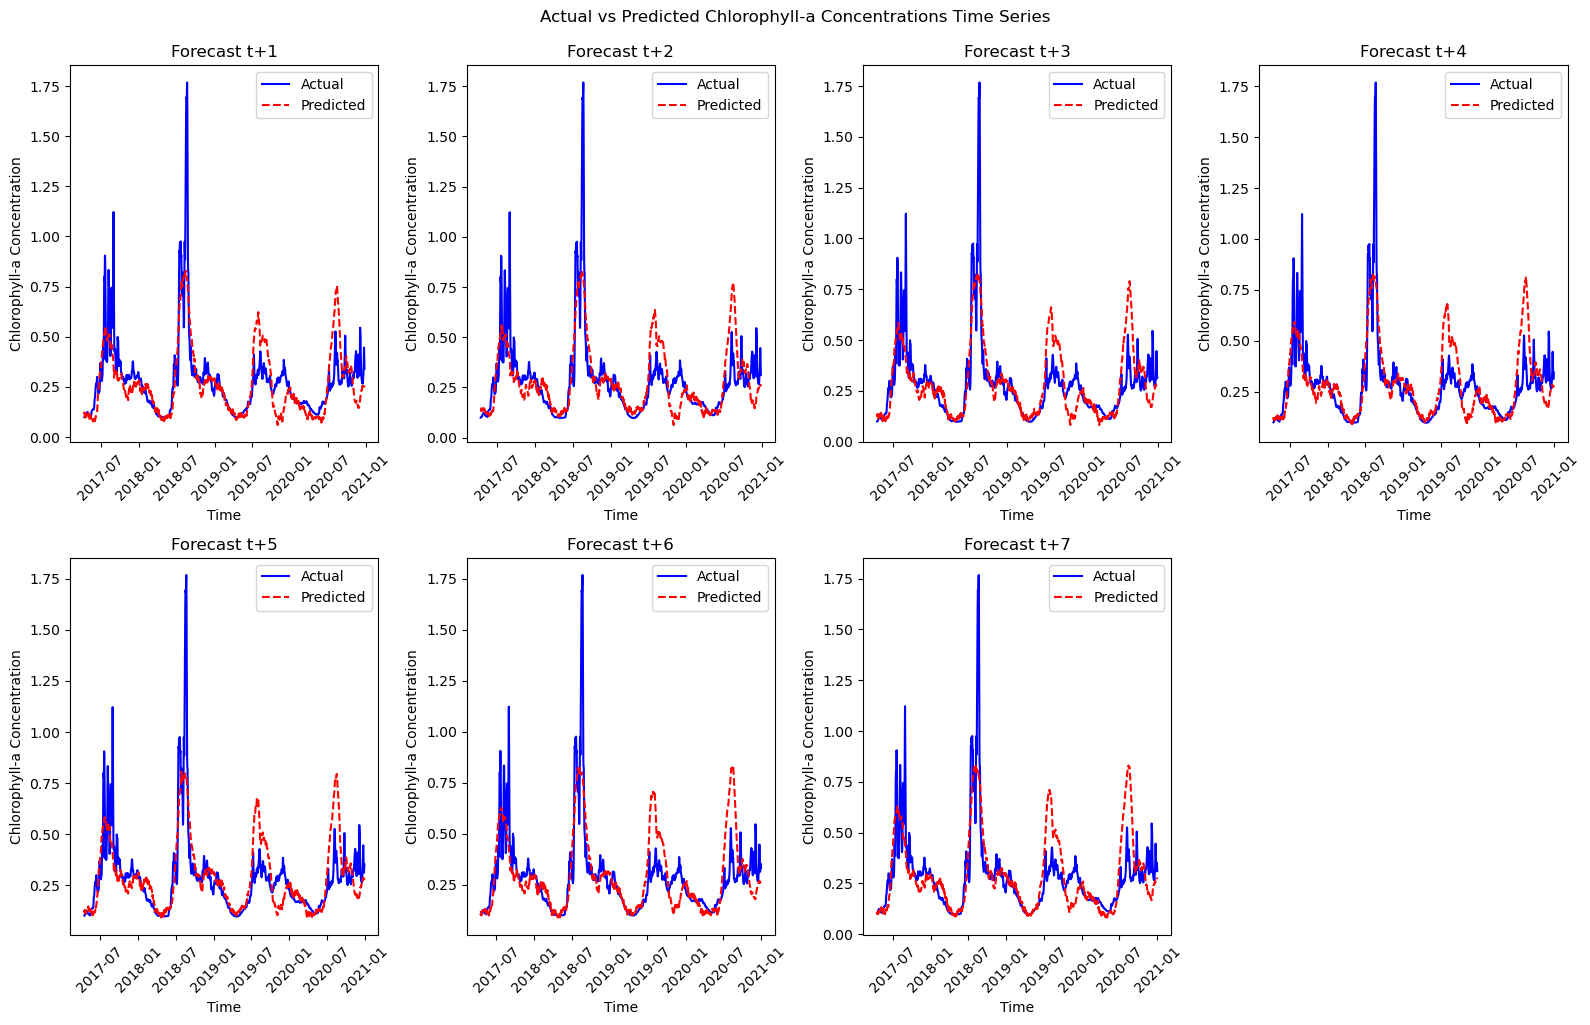

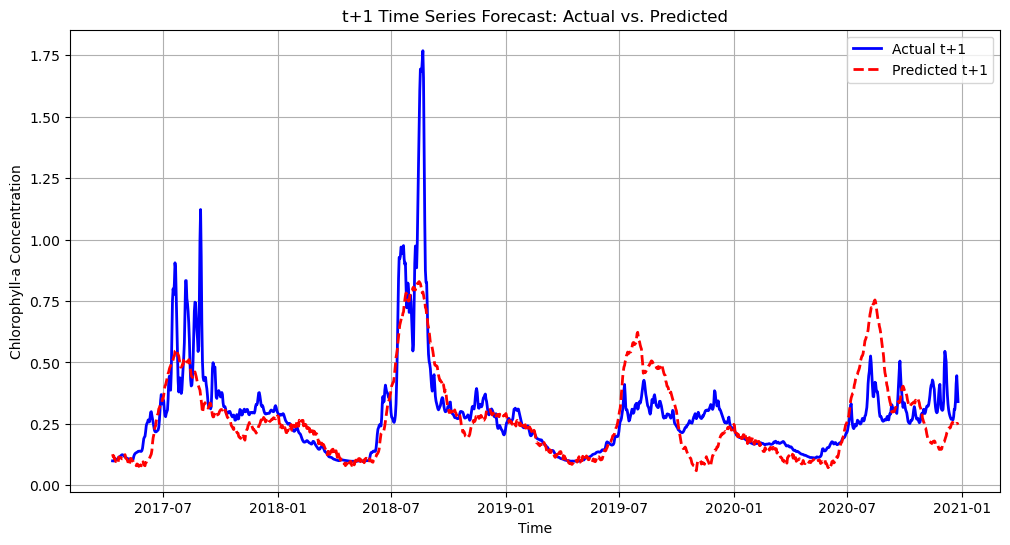

In [8]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Laccadive Sea

#### Model Training

X_train shape: (6808, 125, 2)
Epoch 1/30
213/213 [==============================] - 2s 7ms/step - loss: 0.0865 - val_loss: 0.0566
Epoch 2/30
213/213 [==============================] - 1s 3ms/step - loss: 0.0731 - val_loss: 0.0520
Epoch 3/30
213/213 [==============================] - 1s 5ms/step - loss: 0.0709 - val_loss: 0.0522
Epoch 4/30
213/213 [==============================] - 1s 4ms/step - loss: 0.0683 - val_loss: 0.0522
Epoch 5/30
213/213 [==============================] - 1s 5ms/step - loss: 0.0670 - val_loss: 0.0517
Epoch 6/30
213/213 [==============================] - 1s 4ms/step - loss: 0.0666 - val_loss: 0.0512
Epoch 7/30
213/213 [==============================] - 1s 5ms/step - loss: 0.0659 - val_loss: 0.0517
Epoch 8/30
213/213 [==============================] - 1s 6ms/step - loss: 0.0660 - val_loss: 0.0480
Epoch 9/30
213/213 [==============================] - 1s 5ms/step - loss: 0.0652 - val_loss: 0.0511
Epoch 10/30
213/213 [==============================] - 1s 4ms/step - l

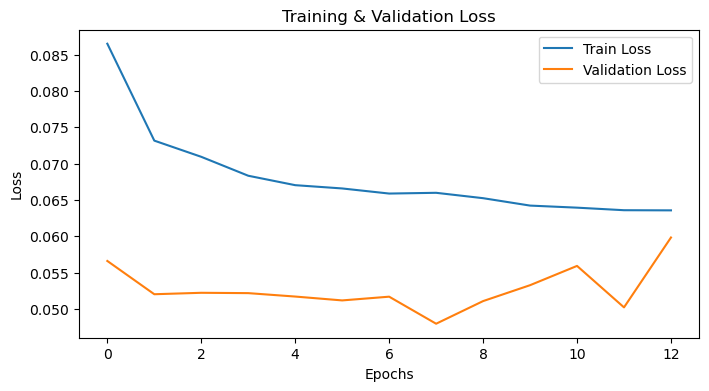

In [10]:
chl_mod.set_seeds(42)
n_lag = 125   
chl_file = "Data_chl_2020/laccadive_sea.nc"
sst_file = "Data_sst_2020/laccadive_sea.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_cnn_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_cnn_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

42/42 [==============================] - 0s 2ms/step
t+1 RMSE: 0.0259 | MAE: 0.0198 | R²: 0.3243
t+2 RMSE: 0.0260 | MAE: 0.0196 | R²: 0.3215
t+3 RMSE: 0.0266 | MAE: 0.0198 | R²: 0.2896
t+4 RMSE: 0.0266 | MAE: 0.0197 | R²: 0.2862
t+5 RMSE: 0.0265 | MAE: 0.0194 | R²: 0.2947
t+6 RMSE: 0.0267 | MAE: 0.0198 | R²: 0.2824
t+7 RMSE: 0.0277 | MAE: 0.0202 | R²: 0.2296


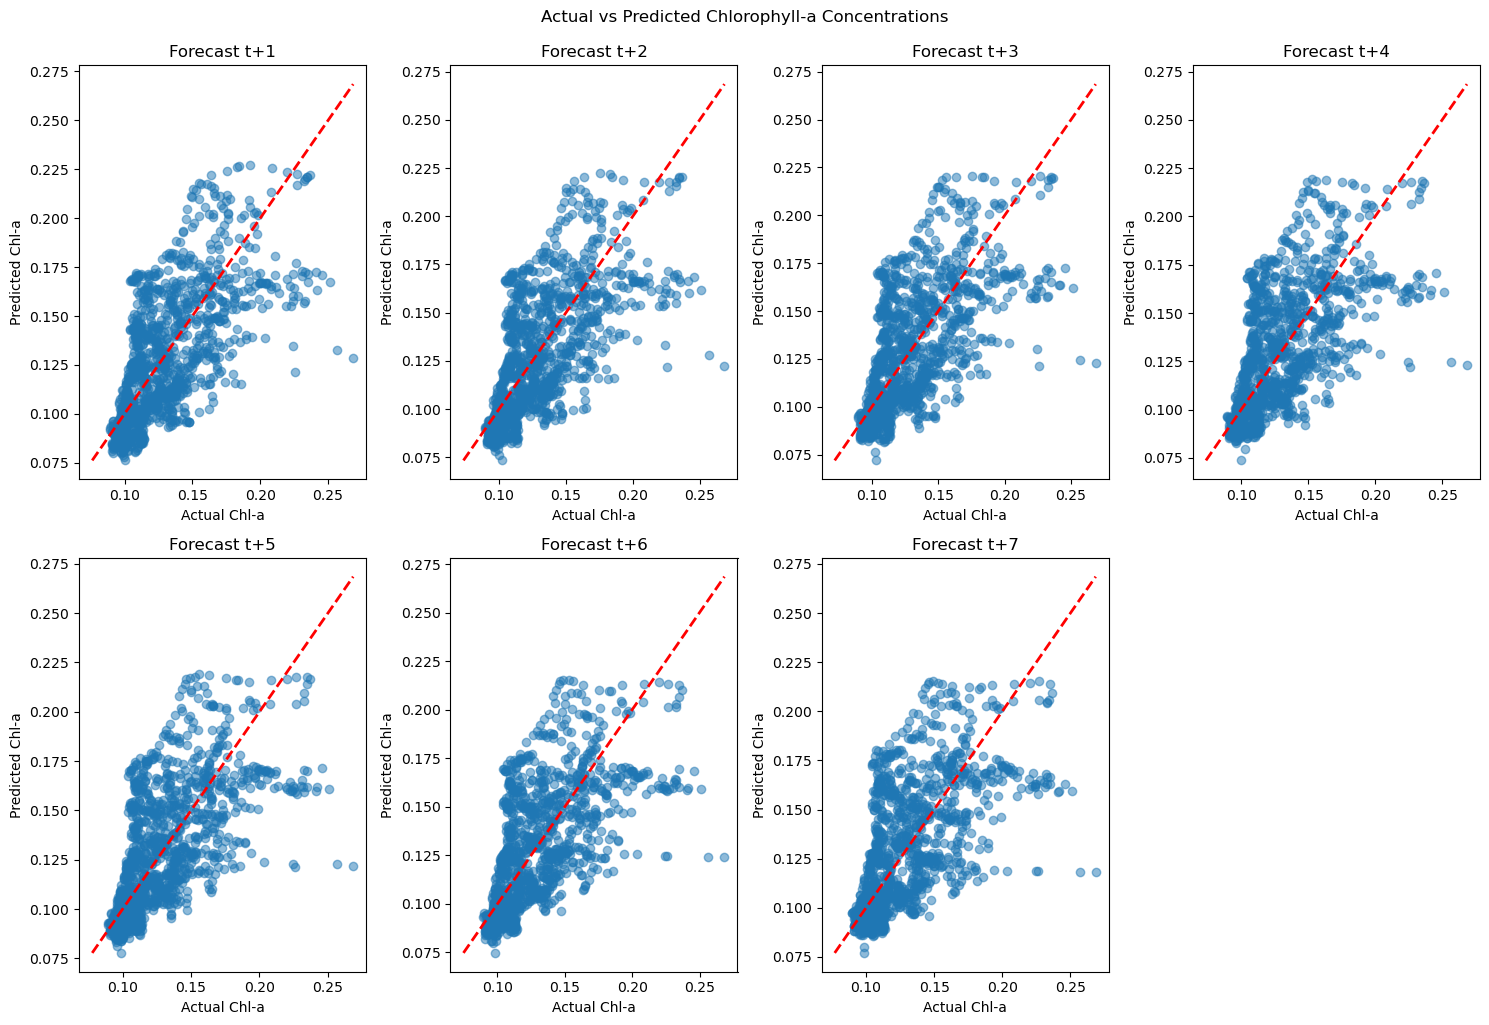

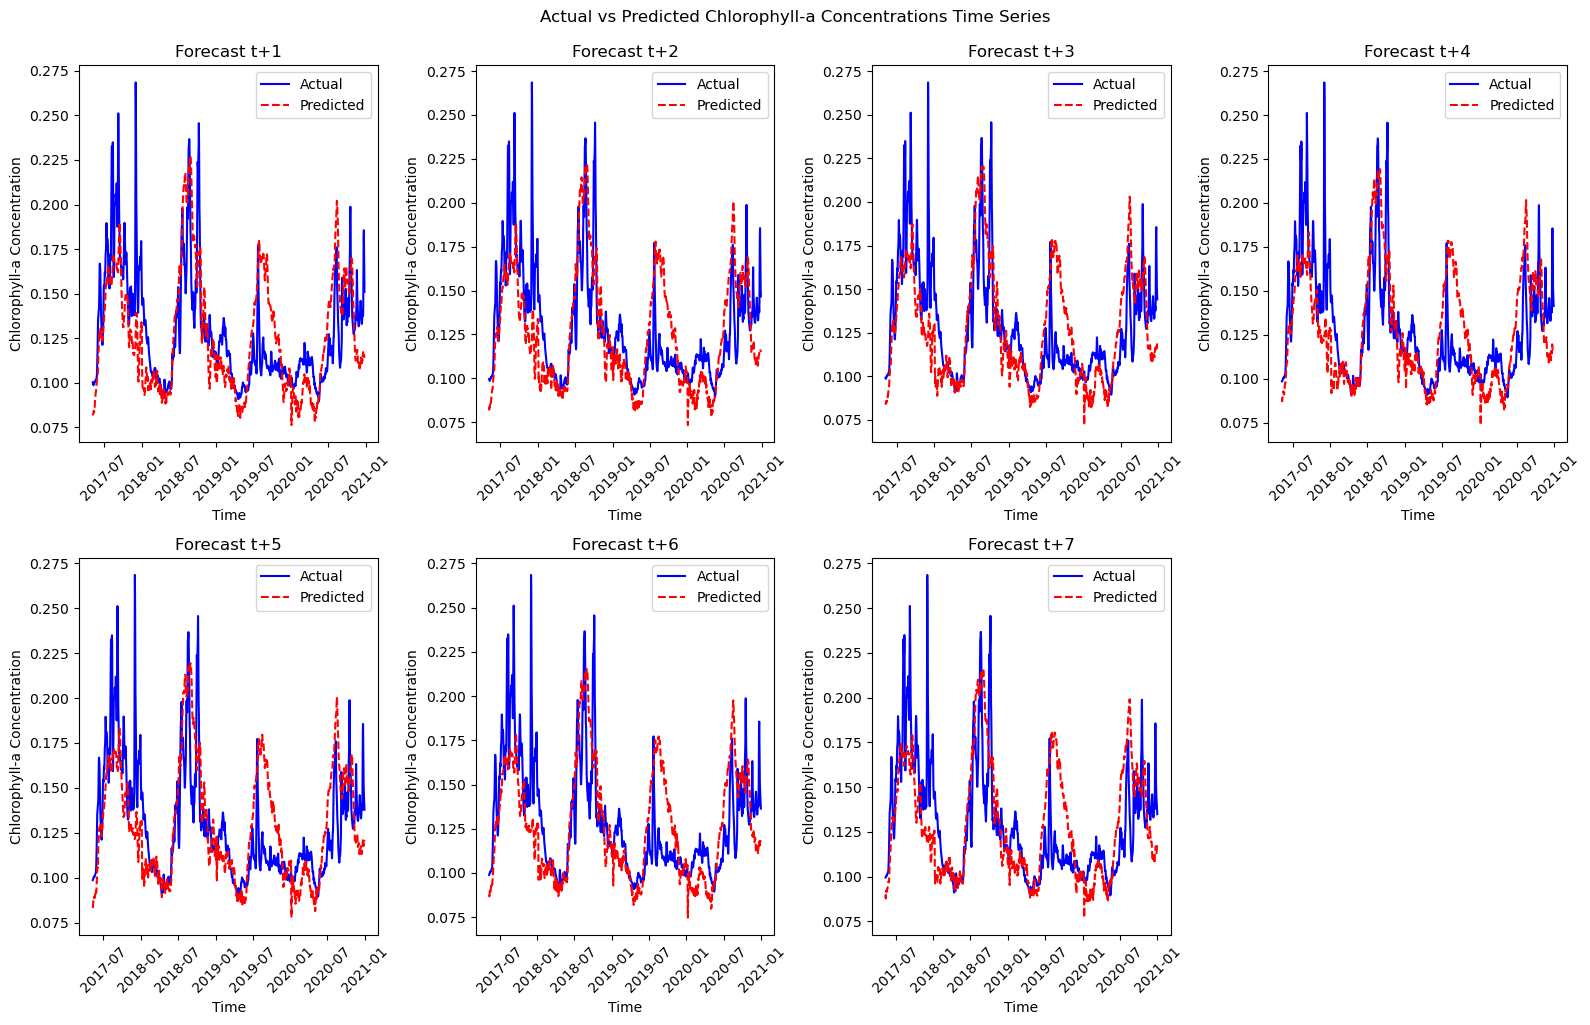

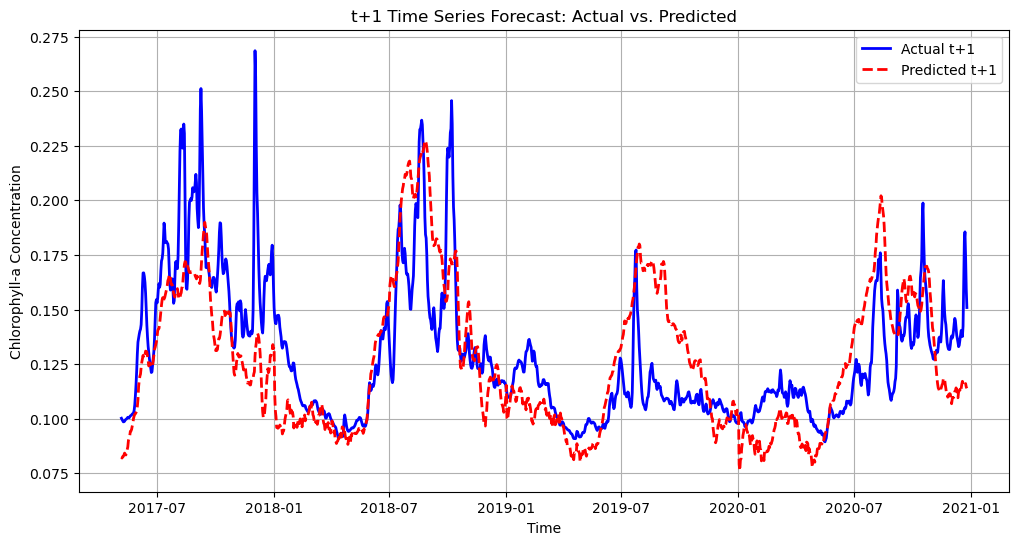

In [11]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)

### Sri Lankan Coast 

#### Model Training

X_train shape: (6808, 125, 2)
Epoch 1/30
213/213 [==============================] - 2s 7ms/step - loss: 0.0704 - val_loss: 0.0523
Epoch 2/30
213/213 [==============================] - 2s 9ms/step - loss: 0.0599 - val_loss: 0.0517
Epoch 3/30
213/213 [==============================] - 2s 10ms/step - loss: 0.0569 - val_loss: 0.0471
Epoch 4/30
213/213 [==============================] - 2s 11ms/step - loss: 0.0561 - val_loss: 0.0542
Epoch 5/30
213/213 [==============================] - 2s 11ms/step - loss: 0.0552 - val_loss: 0.0512
Epoch 6/30
213/213 [==============================] - 2s 10ms/step - loss: 0.0546 - val_loss: 0.0526
Epoch 7/30
213/213 [==============================] - 2s 10ms/step - loss: 0.0541 - val_loss: 0.0480
Epoch 8/30
213/213 [==============================] - 2s 10ms/step - loss: 0.0537 - val_loss: 0.0481


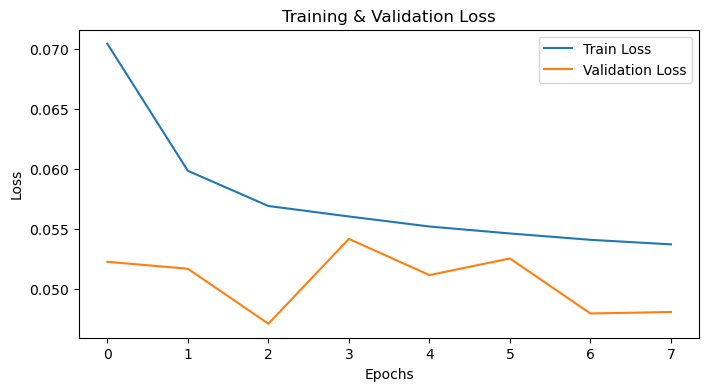

In [13]:
chl_mod.set_seeds(42)
n_lag = 125
chl_file = "Data_chl_2020/sri_lankan_coast.nc"
sst_file = "Data_sst_2020/sri_lankan_coast.nc"
merged_ds = chl_mod.load_and_merge_data(chl_file, sst_file)

# Data splitting 
(train_sst, train_chl, train_month, train_time), (valid_sst, valid_chl, valid_month, valid_time), (test_sst, test_chl, test_month, test_time) = chl_mod.prepare_data_for_modeling(merged_ds)

# Scale and convert to supervised format
X_train, y_train, X_valid, y_valid, X_test, y_test, scaler, chl_min, chl_max = chl_mod.scale_and_create_sequences(train_sst, train_chl, train_month, valid_sst, valid_chl, valid_month, test_sst, test_chl, test_month, n_lag, n_out)
print("X_train shape:", X_train.shape)


model = chl_mod.build_cnn_model(n_lag, n_features, n_out=n_out)

# Fit Model
history = chl_mod.train_cnn_model(model, X_train, y_train, X_valid, y_valid, epochs=epochs, batch_size=batch_size)
chl_mod.plot_training_history(history)


#### Model Testing

42/42 [==============================] - 0s 5ms/step
t+1 RMSE: 0.0295 | MAE: 0.0219 | R²: 0.2056
t+2 RMSE: 0.0283 | MAE: 0.0205 | R²: 0.2666
t+3 RMSE: 0.0275 | MAE: 0.0198 | R²: 0.3077
t+4 RMSE: 0.0296 | MAE: 0.0218 | R²: 0.1937
t+5 RMSE: 0.0287 | MAE: 0.0211 | R²: 0.2424
t+6 RMSE: 0.0296 | MAE: 0.0216 | R²: 0.1968
t+7 RMSE: 0.0281 | MAE: 0.0204 | R²: 0.2712


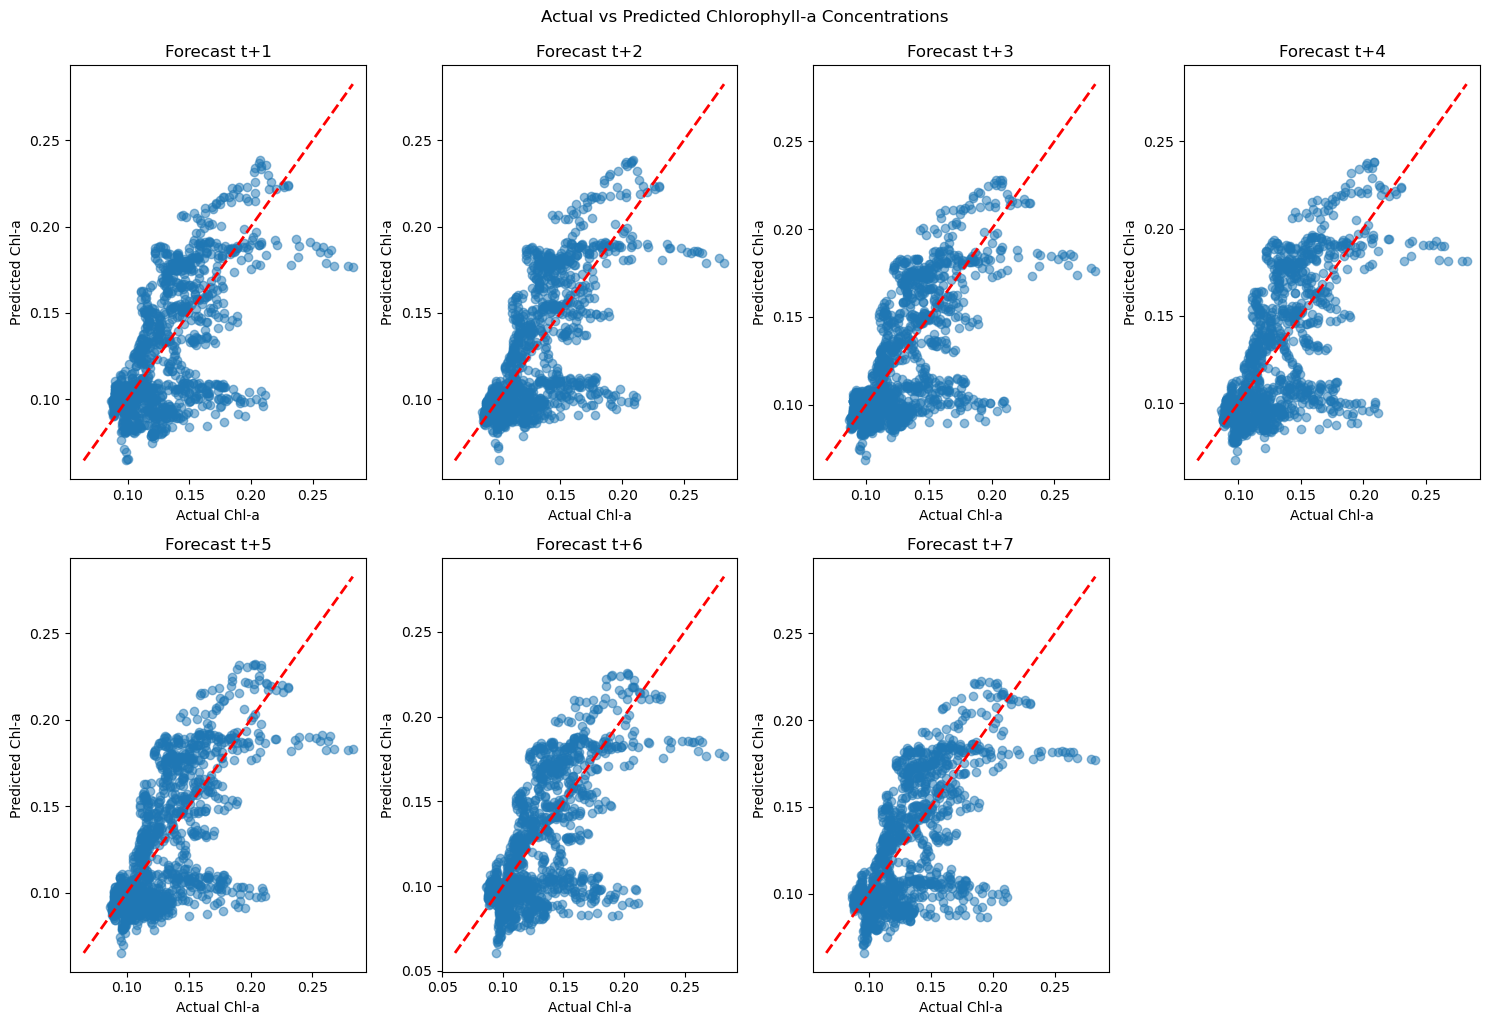

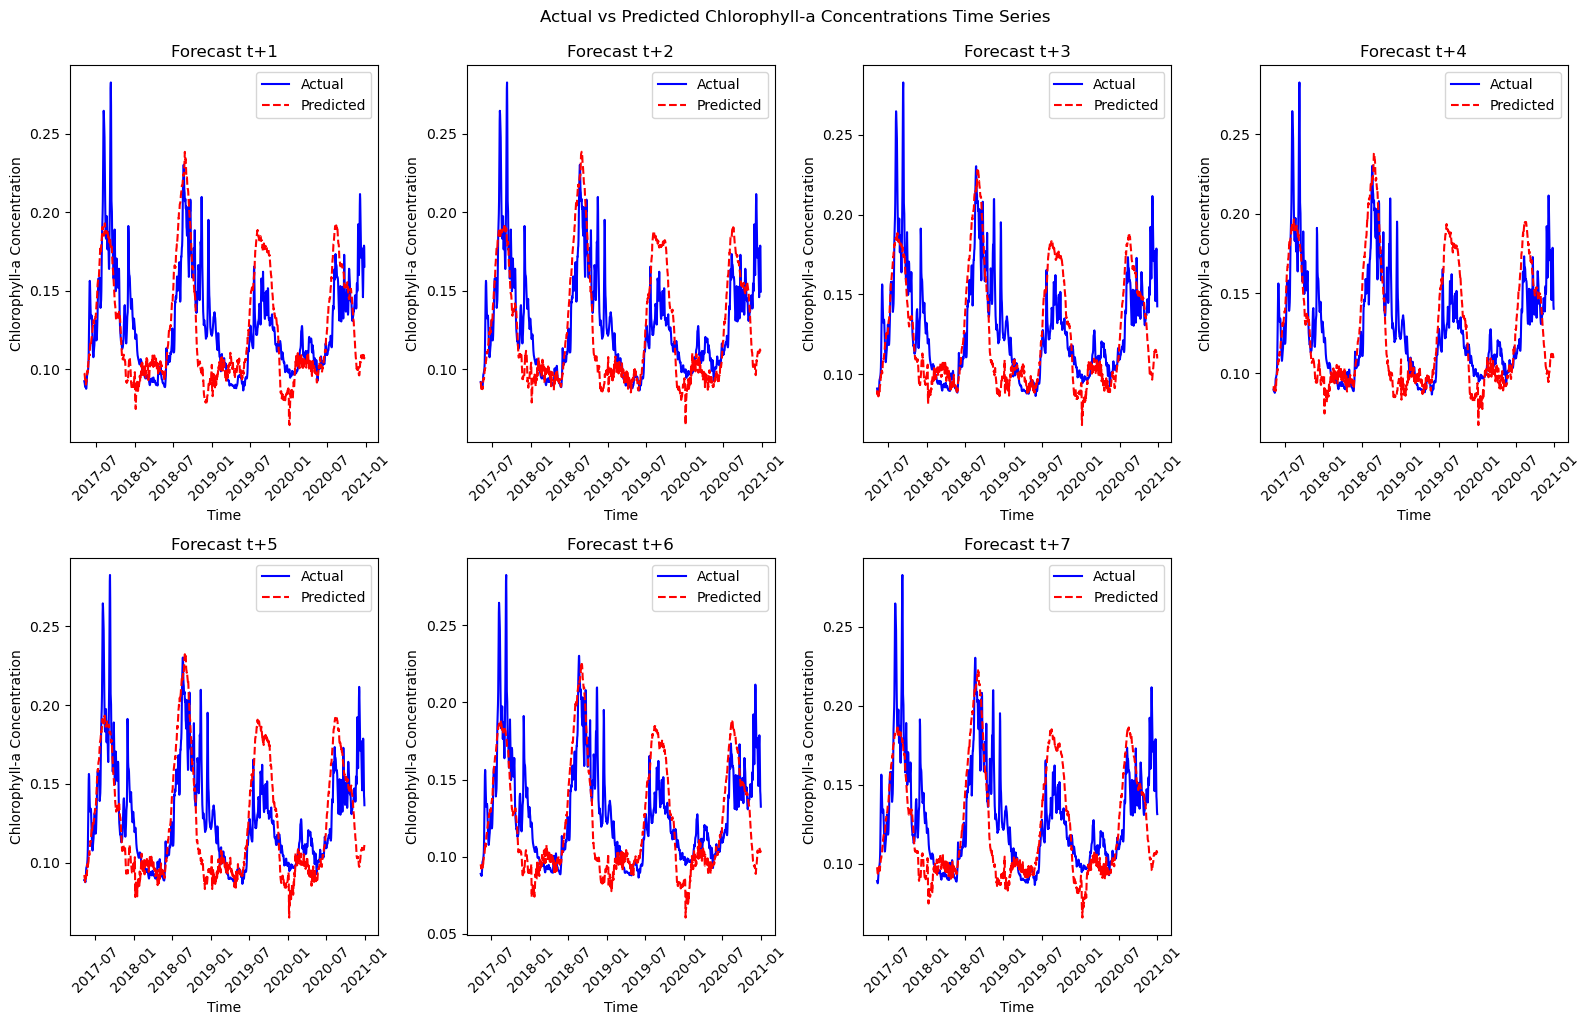

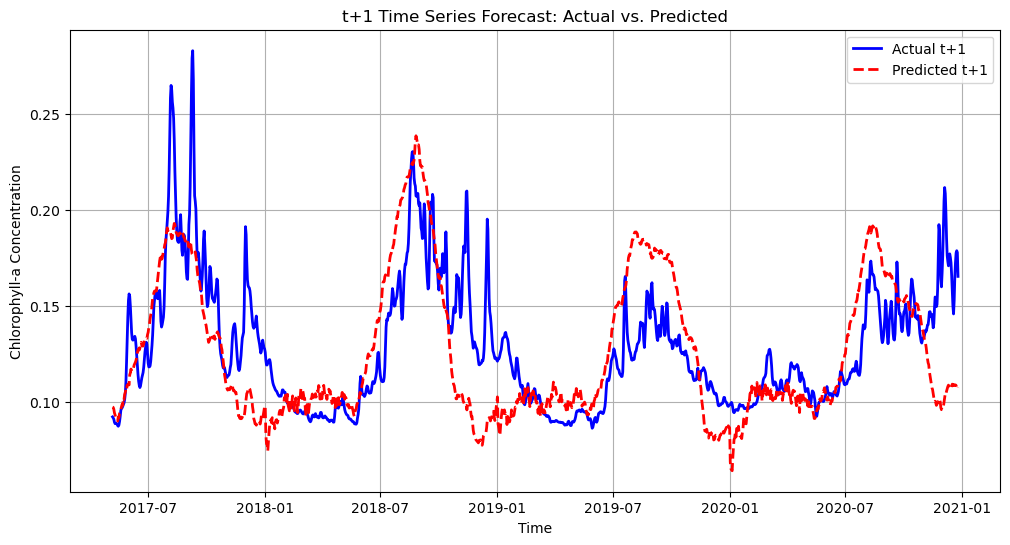

In [14]:
# Forecast and invert scaling
y_pred = model.predict(X_test)

# Invert the scaling of predictions and true target values.
y_pred_inv = chl_mod.invert_chl_scaling(y_pred, chl_min, chl_max)
y_test_inv = chl_mod.invert_chl_scaling(y_test, chl_min, chl_max)

# Evaluate forecasts and plot results.
chl_mod.evaluate_forecasts(y_test_inv, y_pred_inv, n_out)
chl_mod.plot_actual_vs_predicted(y_test_inv, y_pred_inv)
chl_mod.plot_chl_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)
chl_mod.plot_t1_timeseries(test_time, y_test_inv, y_pred_inv, n_lag, n_out)